<a href="https://colab.research.google.com/github/AbbySnt/EstadisticaAplicada_1990002/blob/main/sesion15b_g44_19oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
#librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive

In [211]:
#librerias especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict

##pmdarima
import pmdarima as pm

#ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [212]:
#tamaño de grafica
plt.rcParams['figure.figsize']=(10,6)

In [213]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
df_amazon = pd.read_excel('/content/drive/MyDrive/EA_YASH_1990002/AMAZON.xlsx')

In [215]:
df_amazon.tail()

,fecha,amazon
1252,2018-10-18,88.536003
1253,2018-10-17,91.586502
1254,2018-10-16,90.998001
1255,2018-10-15,88.047501
1256,2018-10-12,89.430496


In [216]:
ultima_obs = df_amazon.loc[1254]

In [217]:
df_amazon = df_amazon.loc[:1253]

In [218]:
df_amazon

,fecha,amazon
0,2023-10-11,131.830002
1,2023-10-10,129.479996
2,2023-10-09,128.259995
3,2023-10-06,127.959999
4,2023-10-05,125.959999
...,...,...
1249,2018-10-23,88.434998
1250,2018-10-22,89.464996
1251,2018-10-19,88.201500
1252,2018-10-18,88.536003


In [219]:
df_amazon = df_amazon.set_index('fecha')

In [220]:

#dias habiles-bussines days
df_amazon = df_amazon.asfreq(freq= 'B')

In [221]:
df_amazon.index

DatetimeIndex(['2018-10-17', '2018-10-18', '2018-10-19', '2018-10-22',
               '2018-10-23', '2018-10-24', '2018-10-25', '2018-10-26',
               '2018-10-29', '2018-10-30',
               ...
               '2023-09-28', '2023-09-29', '2023-10-02', '2023-10-03',
               '2023-10-04', '2023-10-05', '2023-10-06', '2023-10-09',
               '2023-10-10', '2023-10-11'],
              dtype='datetime64[ns]', name='fecha', length=1301, freq='B')

<Axes: xlabel='fecha'>

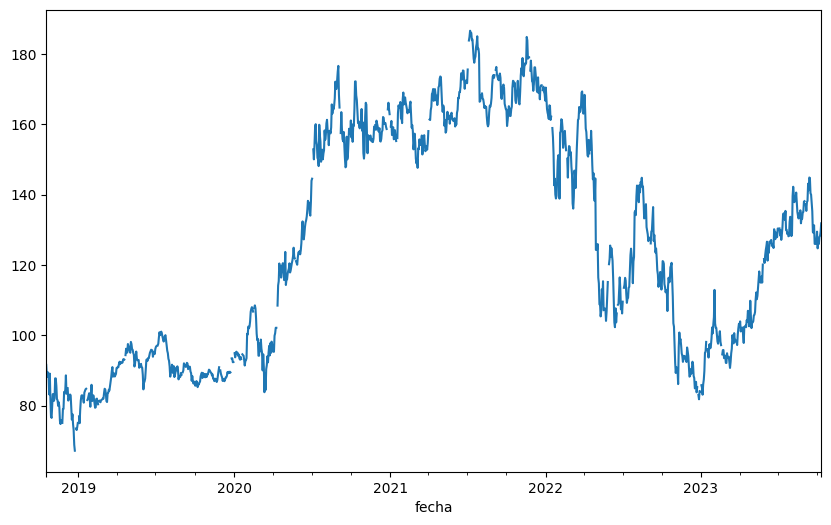

In [222]:
df_amazon['amazon'].plot()

In [223]:
df_amazon['amazon'] = df_amazon['amazon'].fillna(method='pad')

In [224]:
df_amazon.head()

,amazon
fecha,
2018-10-17,91.586502
2018-10-18,88.536003
2018-10-19,88.201500
2018-10-22,89.464996
2018-10-23,88.434998


In [225]:
#prueba de raiz unitaria

prueba_ADF = adfuller(df_amazon['amazon'])
pvalue = prueba_ADF[1]
pvalue.round(2)

0.42

No rechazamos Ho, el precio de la accion de amazon es un proceso

In [226]:
#aplicando primeras diferencias
df_amazon['amazon_diff'] = df_amazon['amazon'].diff()

In [227]:
df_amazon.head()

,amazon,amazon_diff
fecha,,
2018-10-17,91.586502,NaN
2018-10-18,88.536003,-3.050499
2018-10-19,88.201500,-0.334503
2018-10-22,89.464996,1.263496
2018-10-23,88.434998,-1.029998


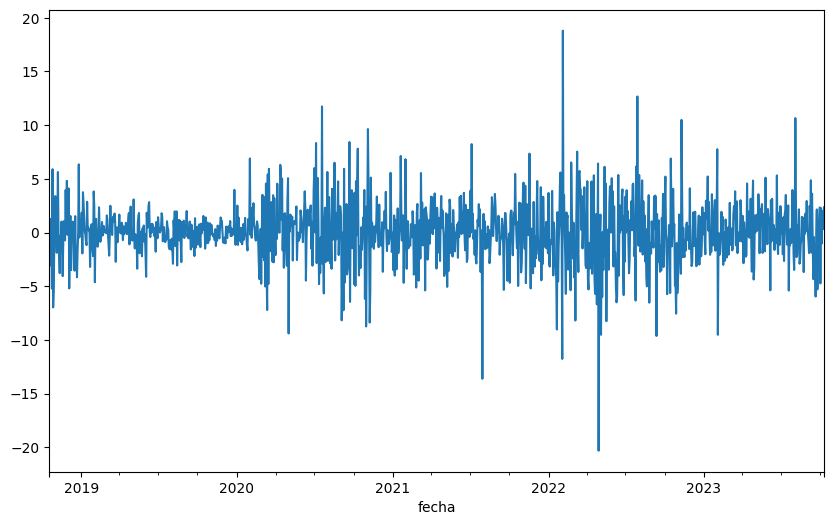

In [228]:
#grafica de las primeras diferencias de amazon
df_amazon['amazon_diff'].plot();

In [229]:
#prueba de raiz unitaria
prueba_ADF1 =adfuller(df_amazon['amazon_diff'].dropna())
pvalue1 = prueba_ADF[1]
pvalue1.round(2)

0.42

Rechazamos Ho, significa que las primeras diferencias de amazon son un proceso estacionario

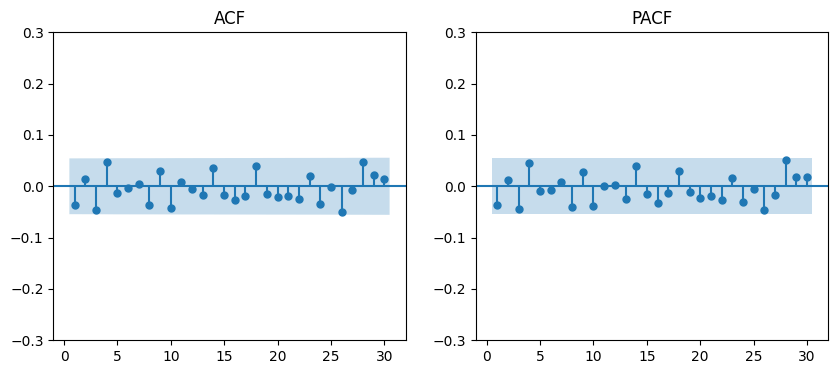

In [230]:
#graficas de correlacion
ig, ax = plt.subplots(1,2, figsize=(10,4))

##1er
plot_acf(df_amazon['amazon_diff'].dropna(),zero=False,lags=30,ax=ax[0], title = 'ACF')
ax[0].set_ylim(-0.3,0.3)
##2da
plot_pacf(df_amazon['amazon_diff'].dropna(),zero = False, lags = 30, ax= ax[1], title = 'PACF')
ax[1].set_ylim(-0.3,0.3)

plt.show()

In [231]:
#vamos a estimar varios modelos y guardar el AIC BIC
ic ={}

for ar in range(7):
  for ma in range(7):
    print(f'AR:{ar},MA:{ma}')
    modelo = ARIMA(df_amazon['amazon_diff'].dropna(),order=(ar,0,ma))
    resultado = modelo.fit()
    ic[(ar,ma)] = [resultado.aic,resultado.bic]

ic = pd.DataFrame(ic, index=['AIC','BIC']).T
ic.index = ic.index.set_names(['AR','MA'])

AR:0,MA:0
AR:0,MA:1
AR:0,MA:2
AR:0,MA:3
AR:0,MA:4
AR:0,MA:5
AR:0,MA:6
AR:1,MA:0
AR:1,MA:1
AR:1,MA:2
AR:1,MA:3
AR:1,MA:4
AR:1,MA:5
AR:1,MA:6
AR:2,MA:0
AR:2,MA:1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:2,MA:2
AR:2,MA:3
AR:2,MA:4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:2,MA:5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:2,MA:6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3,MA:0
AR:3,MA:1
AR:3,MA:2
AR:3,MA:3
AR:3,MA:4
AR:3,MA:5
AR:3,MA:6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4,MA:0
AR:4,MA:1
AR:4,MA:2


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:4,MA:3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4,MA:4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4,MA:5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4,MA:6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:5,MA:0
AR:5,MA:1
AR:5,MA:2
AR:5,MA:3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:5,MA:4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:5,MA:5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:5,MA:6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:6,MA:0
AR:6,MA:1
AR:6,MA:2
AR:6,MA:3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:6,MA:4


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:6,MA:5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:6,MA:6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [232]:
ic.sort_values('AIC').head(1)

,,AIC,BIC
AR,MA,,
2,2,6363.121244,6394.141961


* Las primeras diferencias ARMA(1,1) =ARIMA(1,0,1)
* Accion de amazon ARIMA(1,1,1)

In [233]:
orden_arima = pm.auto_arima(df_amazon['amazon'],
                            start_p =1, start_q = 1,
                            max_p=7,max_q=7,
                            seasonal = False,
                            error_action = 'ignore',
                            ic = 'bic',
                            suppress_warnings = True
                            )

In [234]:
print('las acciones de amazon son:',orden_arima)

las acciones de amazon son:  ARIMA(0,1,0)(0,0,0)[0]          


In [235]:
## ARIMA(1,1,1) accion de amazon
model = ARIMA(df_amazon['amazon'],order=(1,1,1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 amazon   No. Observations:                 1301
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3180.728
Date:                Thu, 19 Oct 2023   AIC                           6367.455
Time:                        18:48:48   BIC                           6382.966
Sample:                    10-17-2018   HQIC                          6373.275
                         - 10-11-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7008      0.200     -3.497      0.000      -1.094      -0.308
ma.L1          0.6613      0.210      3.146      0.002       0.249       1.073
sigma2         7.8110      0.180     43.492      0.0

In [236]:
#pronosticar un periodo
results.predict('2019-12-30')

fecha
2019-12-30     93.582722
2019-12-31     92.328455
2020-01-01     92.400730
2020-01-02     92.386224
2020-01-03     94.805170
                 ...    
2023-10-05    126.775801
2023-10-06    126.149364
2023-10-09    127.755726
2023-10-10    128.383222
2023-10-11    129.350288
Freq: B, Name: predicted_mean, Length: 988, dtype: float64

In [ ]:
plot_predict(results,start = '2019-12-30', end = '2019-12-31')
df_amazon['amazon'].plot()
plt.xlim('2019-12-15','2019-12-31')
plt.legend(loc='upper left')
plt.ylim(50,57)
plt.show()